In [1]:
import os
print(os.getcwd())

\\inmbfp1\redirect1\G560667\My Documents\Enterprise Deep Learning with TF\Week_03


In [2]:
if not os.path.exists("data/fashion"):
    os.makedirs("data/fashion")

In [3]:
# Download the labels from the Fashion MNIST data--download from browser and store in path 
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz --directory-prefix=./data/fashion/
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz --directory-prefix=./data/fashion/
# Download the images from the Fashion MNIST data
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz --directory-prefix=./data/fashion/
!wget http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz --directory-prefix=./data/fashion/

The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.
The system cannot find the path specified.


In [4]:
from tensorflow.examples.tutorials.mnist import input_data
fash_data = input_data.read_data_sets('data/fashion')

Extracting data/fashion\train-images-idx3-ubyte.gz
Extracting data/fashion\train-labels-idx1-ubyte.gz
Extracting data/fashion\t10k-images-idx3-ubyte.gz
Extracting data/fashion\t10k-labels-idx1-ubyte.gz


In [9]:
# Train and test images
X_train = fash_data.train.images
X_test = fash_data.test.images

# Train and test labels
y_train = fash_data.train.labels.astype("int")
y_test = fash_data.test.labels.astype("int")

In [25]:
print(X_train.get_shape())

AttributeError: 'numpy.ndarray' object has no attribute 'get_shape'

In [12]:
# View some input data from the dataset
from matplotlib import pyplot as plt
from random import randint
import numpy as np
%matplotlib inline

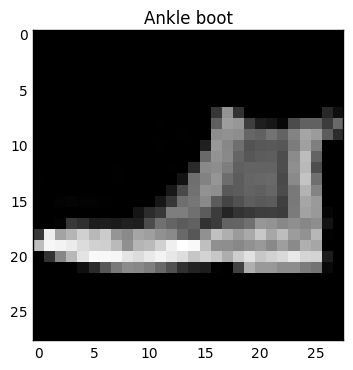

In [13]:
#generate Image
def gen_image(arr, im_title):
    image_data = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.title(im_title)
    plt.imshow(image_data, interpolation='nearest', cmap='gray')
    return plt

fash_labels = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

im_index = randint(0, 100)
batch_X, batch_y = fash_data.test.next_batch(100)
gen_image(batch_X[im_index], fash_labels[batch_y[im_index]]).show()

In [17]:
## NN Parameters
import tensorflow as tf
import numpy as np

num_inputs = 28*28  # Fashion MNIST
num_outputs = 10

num_hidden_1 = 300
num_hidden_2 = 100
num_hidden_3 = 100

In [18]:
# Reset graph and set seed to produce reproducible results across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
    
reset_graph()
##Set this to get same results always 

In [21]:
X=tf.placeholder(tf.float32,shape=(None,num_inputs),name="X")
y=tf.placeholder(tf.int64,shape=(None),name="y")

In [26]:
def hidden_layer(X,num_neurons,name,activation=None):
    with tf.name_scope(name):
        num_inputs=int(X.get_shape()[1])
        stddev=2/np.sqrt(num_inputs)
        init=tf.truncated_normal((num_inputs,num_neurons),stddev=stddev)
        W=tf.Variable(init, name="weights")
        b=tf.Variable(tf.zeros([num_neurons]),name='bias')
        Z=tf.matmul(X,W) + b
        if activation is not None:
            Z=activation(Z)
            
        return Z        

In [27]:
# Defining a one-layer neural network with no non-linearities
## This is all done for name scope to be identified in graph so the variables are all visible correctly
## we used logits as our loss function since output labels are not one hot encoded
## Optimizer is SGD
## Eval evaluates the accuracy
with tf.name_scope("onelayer_nn"):
    hidden_layer_1 = hidden_layer(X, num_neurons=num_hidden_1, name="hidden_layer_1", activation=None)
    logits = hidden_layer(hidden_layer_1, num_outputs, name="outputs")
    
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")    
    
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss) 

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [28]:
# Define the initialization and saver for saving our model to local file system
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [29]:
# Define the number of epochs and batch size 
num_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(num_epochs):
        for iteration in range(fash_data.train.num_examples//batch_size):
            X_batch, y_batch = fash_data.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
            
        # Evaluate test data after every epoch
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test =  accuracy.eval(feed_dict={X: fash_data.test.images, y: fash_data.test.labels})
        
        # Log some results
        print("Epoch:", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./single_layer_model.ckpt")    

Epoch: 0 Train accuracy: 0.78 Test accuracy: 0.8062
Epoch: 1 Train accuracy: 0.88 Test accuracy: 0.8213
Epoch: 2 Train accuracy: 0.86 Test accuracy: 0.8238
Epoch: 3 Train accuracy: 0.78 Test accuracy: 0.8317
Epoch: 4 Train accuracy: 0.8 Test accuracy: 0.8337
Epoch: 5 Train accuracy: 0.9 Test accuracy: 0.8302
Epoch: 6 Train accuracy: 0.88 Test accuracy: 0.8351
Epoch: 7 Train accuracy: 0.82 Test accuracy: 0.8357
Epoch: 8 Train accuracy: 0.84 Test accuracy: 0.8383
Epoch: 9 Train accuracy: 0.9 Test accuracy: 0.8386
Epoch: 10 Train accuracy: 0.88 Test accuracy: 0.8342
Epoch: 11 Train accuracy: 0.96 Test accuracy: 0.8387
Epoch: 12 Train accuracy: 0.84 Test accuracy: 0.8403
Epoch: 13 Train accuracy: 0.92 Test accuracy: 0.8395
Epoch: 14 Train accuracy: 0.88 Test accuracy: 0.8416
Epoch: 15 Train accuracy: 0.9 Test accuracy: 0.8396
Epoch: 16 Train accuracy: 0.88 Test accuracy: 0.8422
Epoch: 17 Train accuracy: 0.88 Test accuracy: 0.8398
Epoch: 18 Train accuracy: 0.88 Test accuracy: 0.8386
Epoch: 

INFO:tensorflow:Restoring parameters from ./single_layer_model.ckpt


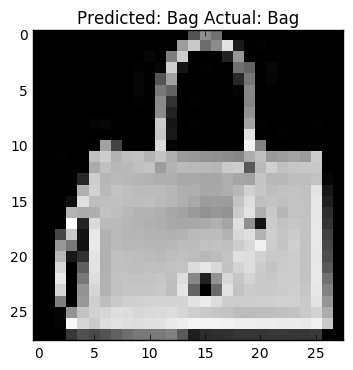

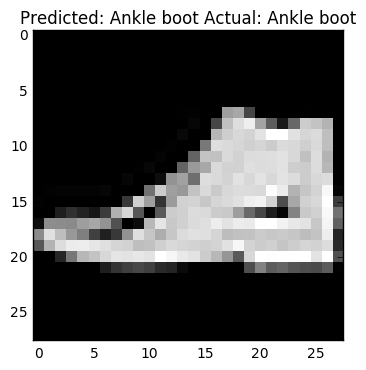

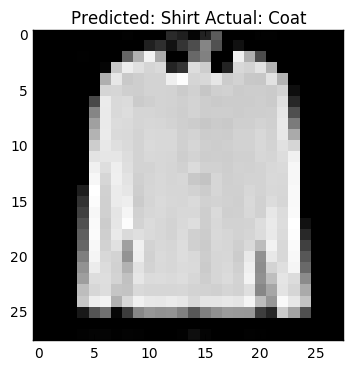

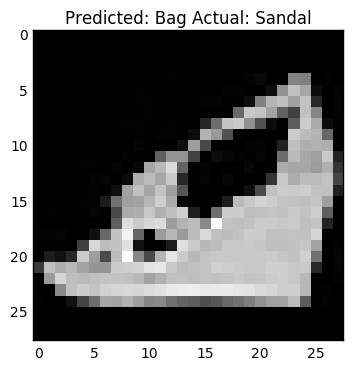

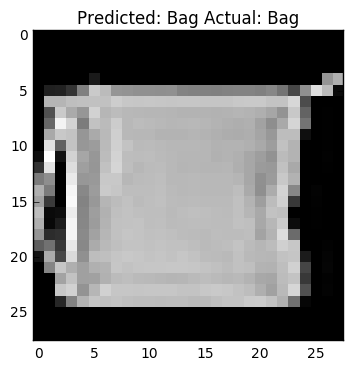

In [35]:
# Evaluate the single-layer neural network
with tf.Session() as sess:
    saver.restore(sess, "./single_layer_model.ckpt") 
    X_new_scaled = fash_data.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

for im_index in range(5):
    gen_image(fash_data.test.images[im_index], 
              "Predicted: %s Actual: %s" % (fash_labels[y_pred[im_index]], 
                                           fash_labels[fash_data.test.labels[im_index]])).show()

In [31]:
y_pred

array([8, 9, 6, 8, 8, 9, 3, 8, 3, 9, 4, 4, 7, 9, 8, 4, 0, 5, 7, 3], dtype=int64)

In [32]:
logits

<tf.Tensor 'onelayer_nn/outputs/add:0' shape=(?, 10) dtype=float32>

In [36]:
# Defining a one layer neural network with ReLU non-linearity
with tf.name_scope("onelayer_nn_relu"):
    hidden_layer_1 = hidden_layer(X, num_neurons=num_hidden_1, name="hidden_layer_1", activation=tf.nn.relu)
    logits = hidden_layer(hidden_layer_1, num_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [37]:
# Define the initialization and saver for saving our model to local file system
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [38]:
# Define the number of epochs and batch size 
num_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(num_epochs):
        # Train the network by feeding in batch_size examples for each iteration
        for iteration in range(fash_data.train.num_examples // batch_size):
            X_batch, y_batch = fash_data.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        # Evaluate test data after every epoch
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: fash_data.test.images, y: fash_data.test.labels})
        
        # Log some results
        print("Epoch:", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./single_layer_model_with_relu.ckpt")

Epoch: 0 Train accuracy: 0.84 Test accuracy: 0.8005
Epoch: 1 Train accuracy: 0.84 Test accuracy: 0.8186
Epoch: 2 Train accuracy: 0.86 Test accuracy: 0.8244
Epoch: 3 Train accuracy: 0.86 Test accuracy: 0.8343
Epoch: 4 Train accuracy: 0.84 Test accuracy: 0.8387
Epoch: 5 Train accuracy: 0.86 Test accuracy: 0.8417
Epoch: 6 Train accuracy: 0.92 Test accuracy: 0.8414
Epoch: 7 Train accuracy: 0.84 Test accuracy: 0.8465
Epoch: 8 Train accuracy: 0.86 Test accuracy: 0.8439
Epoch: 9 Train accuracy: 0.92 Test accuracy: 0.8488
Epoch: 10 Train accuracy: 0.94 Test accuracy: 0.8527
Epoch: 11 Train accuracy: 0.98 Test accuracy: 0.8547
Epoch: 12 Train accuracy: 0.88 Test accuracy: 0.8568
Epoch: 13 Train accuracy: 0.96 Test accuracy: 0.8551
Epoch: 14 Train accuracy: 0.9 Test accuracy: 0.8588
Epoch: 15 Train accuracy: 0.9 Test accuracy: 0.8595
Epoch: 16 Train accuracy: 0.9 Test accuracy: 0.8588
Epoch: 17 Train accuracy: 0.86 Test accuracy: 0.8623
Epoch: 18 Train accuracy: 0.84 Test accuracy: 0.8629
Epoch:

INFO:tensorflow:Restoring parameters from ./single_layer_model_with_relu.ckpt


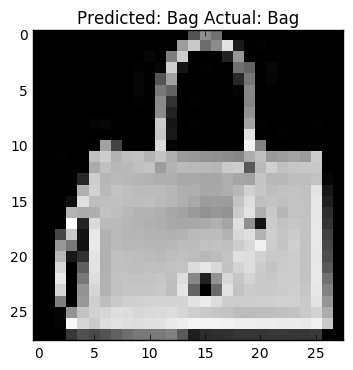

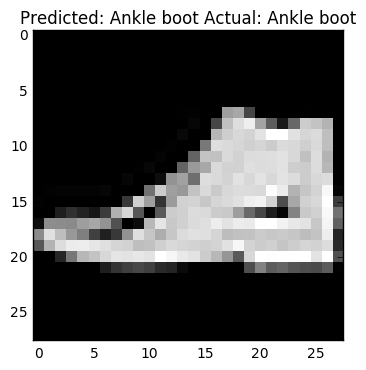

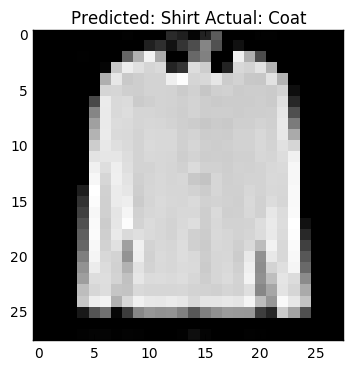

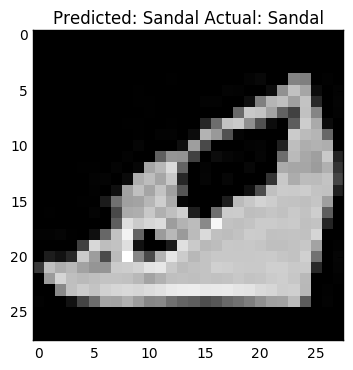

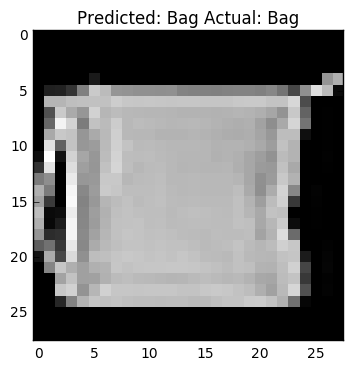

In [40]:
# Evaluate the single layer network with relu
with tf.Session() as sess:
    saver.restore(sess, "./single_layer_model_with_relu.ckpt") 
    X_new_scaled = fash_data.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

for im_index in range(5):
    gen_image(fash_data.test.images[im_index], 
              "Predicted: %s Actual: %s" % (fash_labels[y_pred[im_index]], 
                                           fash_labels[fash_data.test.labels[im_index]])).show()

In [41]:
# Defining a three-layer neural network with ReLU non-linearity
with tf.name_scope("threelayer_nn_relu"):
    hidden_layer_1 = hidden_layer(X, num_neurons=num_hidden_1, name="hidden_layer_1", activation=tf.nn.relu)
    hidden_layer_2 = hidden_layer(hidden_layer_1, num_neurons=num_hidden_2, name="hidden_layer_2", 
                                  activation=tf.nn.relu)
    hidden_layer_3 = hidden_layer(hidden_layer_2, num_neurons=num_hidden_3, name="hidden_layer_3", 
                                  activation=tf.nn.relu)
    logits = hidden_layer(hidden_layer_3, num_outputs, name="outputs")

with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [42]:
# Define the initialization and saver for saving our model to local file system
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [43]:
# Define the number of epochs and batch size 
num_epochs = 20
batch_size = 50

with tf.Session() as sess:
    init.run()
    for epoch in range(num_epochs):
        # Train the network by feeding in batch_size examples for each iteration
        for iteration in range(fash_data.train.num_examples // batch_size):
            X_batch, y_batch = fash_data.train.next_batch(batch_size)
            sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        
        # Evaluate test data after every epoch
        acc_train = accuracy.eval(feed_dict={X: X_batch, y: y_batch})
        acc_test = accuracy.eval(feed_dict={X: fash_data.test.images, y: fash_data.test.labels})
        
        # Log some results
        print("Epoch:", epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)

    save_path = saver.save(sess, "./three_layer_model_with_relu.ckpt")

Epoch: 0 Train accuracy: 0.86 Test accuracy: 0.824
Epoch: 1 Train accuracy: 0.96 Test accuracy: 0.8379
Epoch: 2 Train accuracy: 0.94 Test accuracy: 0.8436
Epoch: 3 Train accuracy: 0.9 Test accuracy: 0.8517
Epoch: 4 Train accuracy: 0.9 Test accuracy: 0.854
Epoch: 5 Train accuracy: 0.92 Test accuracy: 0.8594
Epoch: 6 Train accuracy: 0.82 Test accuracy: 0.8586
Epoch: 7 Train accuracy: 0.88 Test accuracy: 0.8617
Epoch: 8 Train accuracy: 0.9 Test accuracy: 0.8663
Epoch: 9 Train accuracy: 0.96 Test accuracy: 0.865
Epoch: 10 Train accuracy: 0.84 Test accuracy: 0.8694
Epoch: 11 Train accuracy: 0.92 Test accuracy: 0.866
Epoch: 12 Train accuracy: 0.88 Test accuracy: 0.871
Epoch: 13 Train accuracy: 0.9 Test accuracy: 0.8714
Epoch: 14 Train accuracy: 0.92 Test accuracy: 0.8698
Epoch: 15 Train accuracy: 0.92 Test accuracy: 0.8753
Epoch: 16 Train accuracy: 0.96 Test accuracy: 0.8695
Epoch: 17 Train accuracy: 0.94 Test accuracy: 0.8693
Epoch: 18 Train accuracy: 0.94 Test accuracy: 0.8755
Epoch: 19 Tr

INFO:tensorflow:Restoring parameters from ./three_layer_model_with_relu.ckpt


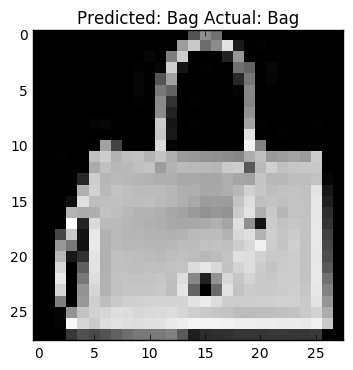

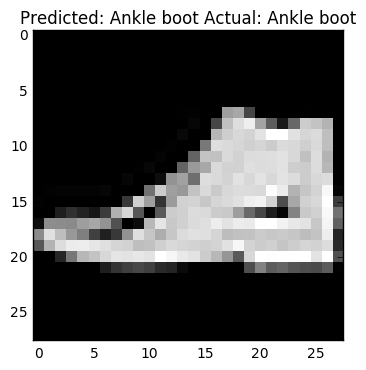

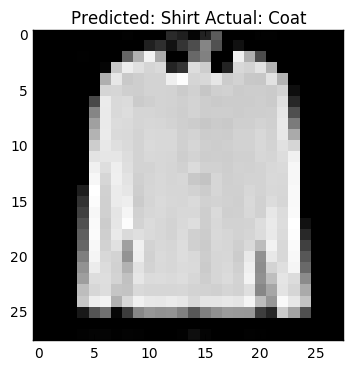

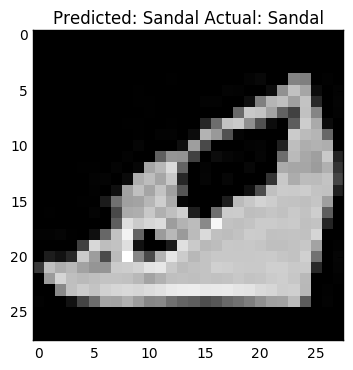

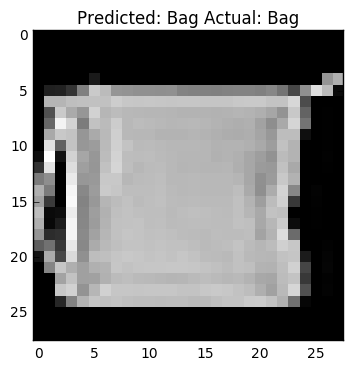

In [44]:
# Evaluate the two layer network with relu
with tf.Session() as sess:
    saver.restore(sess, "./three_layer_model_with_relu.ckpt") 
    X_new_scaled = fash_data.test.images[:20]
    Z = logits.eval(feed_dict={X: X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

for im_index in range(5):
    gen_image(fash_data.test.images[im_index], 
              "Predicted: %s Actual: %s" % (fash_labels[y_pred[im_index]], 
                                           fash_labels[fash_data.test.labels[im_index]])).show()

In [45]:
##Tensorboard in IPython directly else open from terminal

from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))
    
# Show the graph as output below
show_graph(tf.get_default_graph())